# Capstone Project - The Battle of Neighborhoods (Week 2)

### search location and type of venues

#### Importing Modules and packages

In [1]:
# basic libraries for dataframes, maps and webscrapping
import pandas as pd
import requests
import numpy as np
import random
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim

In [2]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
from IPython.display import display_html

In [3]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#### import postal code txt file

In [4]:
path = open ('CH_postal_codes.txt','r')
print (path.read())
path.close()

CH	5000	Aarau	Kanton Aargau	AG	Bezirk Aarau	1901	Aarau	4001	47.3925	8.0442	4
CH	5001	Aarau 1	Kanton Aargau	AG	Bezirk Aarau	1901	Aarau	4001	47.3888	8.0483	
CH	5004	Aarau	Kanton Aargau	AG	Bezirk Aarau	1901	Aarau	4001	47.3925	8.0442	4
CH	5017	Barmelweid	Kanton Aargau	AG	Bezirk Aarau	1901	Erlinsbach (AG)	4005	47.4159	7.9764	4
CH	5018	Erlinsbach	Kanton Aargau	AG	Bezirk Aarau	1901	Erlinsbach (AG)	4005	47.4052	8.0151	4
CH	5022	Rombach	Kanton Aargau	AG	Bezirk Aarau	1901	KÃ¼ttigen	4008	47.4047	8.0459	4
CH	5023	Biberstein	Kanton Aargau	AG	Bezirk Aarau	1901	Biberstein	4002	47.4164	8.0851	4
CH	5024	KÃ¼ttigen	Kanton Aargau	AG	Bezirk Aarau	1901	KÃ¼ttigen	4008	47.4157	8.0477	4
CH	5025	Asp	Kanton Aargau	AG	Bezirk Aarau	1901	DensbÃ¼ren	4004	47.445	8.0503	4
CH	5026	DensbÃ¼ren	Kanton Aargau	AG	Bezirk Aarau	1901	DensbÃ¼ren	4004	47.4526	8.0533	4
CH	5032	Aarau Rohr	Kanton Aargau	AG	Bezirk Aarau	1901	Aarau	4001	47.4017	8.0796	4
CH	5033	Buchs AG	Kanton Aargau	AG	Bezirk Aarau	1901	Buchs (AG)	4003	47.3936	8.082

In [5]:
codes = pd.read_csv('CH_postal_codes.txt', delimiter="\t", header=None)
codes.columns = ["country", "postal_code", "place", "kanton",'kanton_letter','admin name2','admin code2','kanton_name','admin code3','latitude','longitude','accuracy']
codes

country  postal_code              place         kanton kanton_letter  \
0         CH         5000              Aarau  Kanton Aargau            AG   
1         CH         5001            Aarau 1  Kanton Aargau            AG   
2         CH         5004              Aarau  Kanton Aargau            AG   
3         CH         5017         Barmelweid  Kanton Aargau            AG   
4         CH         5018         Erlinsbach  Kanton Aargau            AG   
...      ...          ...                ...            ...           ...   
4351      CH         8092             Zürich  Kanton Zürich            ZH   
4352      CH         8093             Zürich  Kanton Zürich            ZH   
4353      CH         8096  Zürich IBRS local  Kanton Zürich            ZH   
4354      CH         8098             Zürich  Kanton Zürich            ZH   
4355      CH         8099             Zürich  Kanton Zürich            ZH   

        admin name2  admin code2      kanton_name  admin code3  latitude  \
0      Bezirk Aarau         1901            Aarau         4001   47.3925   
1      Bezirk Aarau         1901            Aarau         4001   47.3888   
2      Bezirk Aarau         1901            Aarau         4001   47.3925   
3      Bezirk Aarau         1901  Erlinsbach (AG)         4005   47.4159   
4      Bezirk Aarau         1901  Erlinsbach (AG)         4005   47.4052   
...             ...          ...              ...          ...       ...   
4351  Bezirk Zürich          112           Zürich          261   47.3828   
4352  Bezirk Zürich          112           Zürich          261   47.3828   
4353  Bezirk Zürich          112           Zürich          261   47.3828   
4354  Bezirk Zürich          112           Zürich          261   47.3828   
4355  Bezirk Zürich          112           Zürich          261   47.3828   

      longitude  accuracy  
0        8.0442       4.0  
1        8.0483       NaN  
2        8.0442       4.0  
3        7.9764       4.0  
4        8.0151       4.0  
...         ...       ...  
4351     8.5307       NaN  
4352     8.5307       NaN  
4353     8.5307       NaN  
4354     8.5307       NaN  
4355     8.5307       NaN  

[4356 rows x 12 columns]

In [6]:
# basic data cleaning
codes.drop(['place','admin code3','admin code2', 'accuracy'],axis=1, inplace=True)
codes

country  postal_code         kanton kanton_letter    admin name2  \
0         CH         5000  Kanton Aargau            AG   Bezirk Aarau   
1         CH         5001  Kanton Aargau            AG   Bezirk Aarau   
2         CH         5004  Kanton Aargau            AG   Bezirk Aarau   
3         CH         5017  Kanton Aargau            AG   Bezirk Aarau   
4         CH         5018  Kanton Aargau            AG   Bezirk Aarau   
...      ...          ...            ...           ...            ...   
4351      CH         8092  Kanton Zürich            ZH  Bezirk Zürich   
4352      CH         8093  Kanton Zürich            ZH  Bezirk Zürich   
4353      CH         8096  Kanton Zürich            ZH  Bezirk Zürich   
4354      CH         8098  Kanton Zürich            ZH  Bezirk Zürich   
4355      CH         8099  Kanton Zürich            ZH  Bezirk Zürich   

          kanton_name  latitude  longitude  
0               Aarau   47.3925     8.0442  
1               Aarau   47.3888     8.0483  
2               Aarau   47.3925     8.0442  
3     Erlinsbach (AG)   47.4159     7.9764  
4     Erlinsbach (AG)   47.4052     8.0151  
...               ...       ...        ...  
4351           Zürich   47.3828     8.5307  
4352           Zürich   47.3828     8.5307  
4353           Zürich   47.3828     8.5307  
4354           Zürich   47.3828     8.5307  
4355           Zürich   47.3828     8.5307  

[4356 rows x 8 columns]

In [7]:
# select specific kanton
#codes_bl=codes[codes['kanton_letter'].isin(['ZH'])]#add more if neccesary
#codes_bl

In [8]:
# Check for duplicate values in the column movie
codes.postal_code.duplicated().any()

True

In [9]:
# Find out the movies with duplicate movie
codes.loc[codes.postal_code.duplicated(keep=False)]

country  postal_code         kanton kanton_letter        admin name2  \
28        CH         5412  Kanton Aargau            AG       Bezirk Baden   
29        CH         5412  Kanton Aargau            AG       Bezirk Baden   
31        CH         5415  Kanton Aargau            AG       Bezirk Baden   
32        CH         5415  Kanton Aargau            AG       Bezirk Baden   
33        CH         5415  Kanton Aargau            AG       Bezirk Baden   
...      ...          ...            ...           ...                ...   
4283      CH         8543  Kanton Zürich            ZH  Bezirk Winterthur   
4285      CH         8545  Kanton Zürich            ZH  Bezirk Winterthur   
4286      CH         8545  Kanton Zürich            ZH  Bezirk Winterthur   
4287      CH         8546  Kanton Zürich            ZH  Bezirk Winterthur   
4325      CH         8044  Kanton Zürich            ZH      Bezirk Zürich   

          kanton_name  latitude  longitude  
28         Gebenstorf   47.4814     8.2395  
29         Gebenstorf   47.4943     8.2382  
31     Obersiggenthal   47.4871     8.3115  
32     Obersiggenthal   47.4872     8.2917  
33     Obersiggenthal   47.4846     8.3018  
...               ...       ...        ...  
4283     Wiesendangen   47.5407     8.8230  
4285  Rickenbach (ZH)   47.5395     8.7889  
4286  Rickenbach (ZH)   47.5519     8.7965  
4287     Wiesendangen   47.5494     8.8215  
4325           Zürich   47.3667     8.5500  

[1599 rows x 8 columns]

In [10]:
# sorting by first name 
codes.sort_values("postal_code", inplace = True)


In [11]:
# dropping ALL duplicte values 
codes.drop_duplicates(subset ="postal_code", keep = 'first', inplace = True)
codes.sort_values("kanton_name", inplace = True)
codes.drop_duplicates(subset ="kanton_name", keep = 'first', inplace = True) 

# Check for duplicate values in the column movie
print(codes.postal_code.duplicated().any())
print(codes.kanton_name.duplicated().any())


False
False


In [12]:
codes.head(15)


country  postal_code            kanton kanton_letter  \
2768      CH         9547    Kanton Thurgau            TG   
0         CH         5000     Kanton Aargau            AG   
441       CH         3270   Canton de Berne            BE   
216       CH         4663     Kanton Aargau            AG   
494       CH         4912   Canton de Berne            BE   
198       CH         5646     Kanton Aargau            AG   
3530      CH         1123    Canton de Vaud            VD   
2884      CH         6724            Ticino            TI   
860       CH         3715   Canton de Berne            BE   
1897      CH         6043     Kanton Luzern            LU   
4057      CH         8452     Kanton Zürich            ZH   
4155      CH         8134     Kanton Zürich            ZH   
2436      CH         4714  Kanton Solothurn            SO   
552       CH         3426   Canton de Berne            BE   
397       CH         2558   Canton de Berne            BE   

                            admin name2     kanton_name  latitude  longitude  
2768                Münchwilen District          Aadorf   47.5048     8.9231  
0                          Bezirk Aarau           Aarau   47.3925     8.0442  
441                    Seeland District         Aarberg   47.0444     7.2758  
216                     Bezirk Zofingen         Aarburg   47.3207     7.8999  
494                          Oberaargau       Aarwangen   47.2385     7.7685  
198                         Bezirk Muri          Abtwil   47.1733     8.3577  
3530                    Morges District          Aclens   46.5663     6.5115  
2884                    Blenio District      Acquarossa   46.4945     8.9410  
860   Frutigen-Niedersimmental District       Adelboden   46.4914     7.5603  
1897              Lucerne-Land District     Adligenswil   47.0652     8.3612  
4057                 Bezirk Andelfingen         Adlikon   47.5823     8.6915  
4155                      Bezirk Horgen        Adliswil   47.3100     8.5246  
2436                        Bezirk Thal  Aedermannsdorf   47.3037     7.6105  
552                   Emmental District        Aefligen   47.0957     7.5517  
397                Biel/Bienne District        Aegerten   47.1211     7.2916

In [13]:
swiss_database=codes
print('The dataframe has {} kanton_letter and {} neighborhoods.'.format(
        len(swiss_database['kanton_letter'].unique()),
        swiss_database.shape[0]
    )
)

The dataframe has 26 kanton_letter and 2029 neighborhoods.


In [14]:
address = 'Kanton Zürich, CH'

geolocator = Nominatim(user_agent="swiss_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Zurich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Zurich are 47.4133024, 8.656394.


### Localization of codes in the map

In [15]:
import folium # plotting library

map_switzerland = folium.Map(location=[latitude, longitude], zoom_start=13) # 

# add a red circle marker 
for latitude, longitude, i in zip(swiss_database['latitude'],swiss_database['longitude'],swiss_database['kanton_name']):
    
    label = '{}'.format(i)
    lable = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup=label,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6,
    parse_html= False).add_to(map_switzerland)



map_switzerland

### CLuster of postal codes

In [16]:
from folium import plugins
map_switzerland = folium.Map(location=[latitude, longitude], zoom_start=13) # 

incidents = plugins.MarkerCluster().add_to(map_switzerland)

# add a red circle marker 
for latitude, longitude, i in zip(swiss_database['latitude'],swiss_database['longitude'],swiss_database['kanton_name']):
    
    label = '{}'.format(i)
    lable = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='blue',
    popup=label,
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.6,
    parse_html= False).add_to(incidents)



map_switzerland

In [17]:
swiss_database.head()

country  postal_code           kanton kanton_letter          admin name2  \
2768      CH         9547   Kanton Thurgau            TG  Münchwilen District   
0         CH         5000    Kanton Aargau            AG         Bezirk Aarau   
441       CH         3270  Canton de Berne            BE     Seeland District   
216       CH         4663    Kanton Aargau            AG      Bezirk Zofingen   
494       CH         4912  Canton de Berne            BE           Oberaargau   

     kanton_name  latitude  longitude  
2768      Aadorf   47.5048     8.9231  
0          Aarau   47.3925     8.0442  
441      Aarberg   47.0444     7.2758  
216      Aarburg   47.3207     7.8999  
494    Aarwangen   47.2385     7.7685

In [18]:
swiss_database.sort_values("kanton_letter", inplace = True)
swiss_database.head()

country  postal_code         kanton kanton_letter         admin name2  \
92       CH         5210  Kanton Aargau            AG        Bezirk Brugg   
215      CH         4332  Kanton Aargau            AG  Bezirk Rheinfelden   
109      CH         5246  Kanton Aargau            AG        Bezirk Brugg   
50       CH         5608  Kanton Aargau            AG        Bezirk Baden   
220      CH         4802  Kanton Aargau            AG     Bezirk Zofingen   

      kanton_name  latitude  longitude  
92       Windisch   47.4790     8.2184  
215    Stein (AG)   47.5440     7.9526  
109        Lupfig   47.4469     8.1842  
50   Stetten (AG)   47.4017     8.3019  
220  Strengelbach   47.2792     7.9290

### selecting Zurich for Analysis

In [19]:
zurich_data = swiss_database[swiss_database['kanton'] == 'Kanton Zürich'].reset_index(drop=True)
zurich_data.head()

country  postal_code         kanton kanton_letter         admin name2  \
0      CH         8185  Kanton Zürich            ZH       Bezirk Bülach   
1      CH         8903  Kanton Zürich            ZH     Bezirk Dietikon   
2      CH         8134  Kanton Zürich            ZH       Bezirk Horgen   
3      CH         8482  Kanton Zürich            ZH   Bezirk Winterthur   
4      CH         8452  Kanton Zürich            ZH  Bezirk Andelfingen   

        kanton_name  latitude  longitude  
0            Winkel   47.4919     8.5537  
1  Birmensdorf (ZH)   47.3552     8.4426  
2          Adliswil   47.3100     8.5246  
3        Winterthur   47.4680     8.7578  
4           Adlikon   47.5823     8.6915

In [20]:
zurich_data.shape

(158, 8)

In [21]:
solo_data = swiss_database[swiss_database['kanton'] == 'Kanton Solothurn'].reset_index(drop=True)
solo_data.head()

country  postal_code            kanton kanton_letter        admin name2  \
0      CH         5015  Kanton Solothurn            SO      Bezirk Gösgen   
1      CH         4626  Kanton Solothurn            SO         Bezirk Gäu   
2      CH         4228  Kanton Solothurn            SO  Bezirk Thierstein   
3      CH         5013  Kanton Solothurn            SO      Bezirk Gösgen   
4      CH         4566  Kanton Solothurn            SO   Bezirk Wasseramt   

       kanton_name  latitude  longitude  
0  Erlinsbach (SO)   47.4000     8.0000  
1  Niederbuchsiten   47.2965     7.7718  
2         Erschwil   47.3739     7.5414  
3     Niedergösgen   47.3722     7.9912  
4     Kriegstetten   47.1745     7.5980

In [22]:
solo_data.shape

(98, 8)

In [23]:
address = 'Kanton Zürich, CH'

geolocator = Nominatim(user_agent="swiss_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Zurich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Zurich are 47.4133024, 8.656394.


In [24]:
# create map of Zurich using latitude and longitude values
map_zurich = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(zurich_data['latitude'], zurich_data['longitude'], zurich_data['kanton_name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zurich)  
    
map_zurich

### This are the different 98 neigborhoods in Zurich.

### Now we will connect Foursquare to explore this area and each of the 98 neigborhoods

In [25]:
### Define Foursquare Credentials and Version
CLIENT_ID = 'X0Y0FEGVLJA5GZ0APYUAHP52YOTI0OYR5FBAZQ5JQSOUSY5X' # your Foursquare ID
CLIENT_SECRET = 'TCIWOXLRKHVFDX0P5ZN3AOLSGYDHMMHNIJ3V1WBSKOZC1ACG' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: X0Y0FEGVLJA5GZ0APYUAHP52YOTI0OYR5FBAZQ5JQSOUSY5X
CLIENT_SECRET:TCIWOXLRKHVFDX0P5ZN3AOLSGYDHMMHNIJ3V1WBSKOZC1ACG


In [26]:
# Get the neighborhood's name
zurich_data.loc[2, 'kanton_name']

'Adliswil'

In [27]:
#Get the neighborhood's latitude and longitude values.
neighborhood_latitude = zurich_data.loc[2, 'latitude'] # neighborhood latitude value
neighborhood_longitude = zurich_data.loc[2, 'longitude'] # neighborhood longitude value

neighborhood_name = zurich_data.loc[2, 'kanton_name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Adliswil are 47.31, 8.5246.


#### Now, let's get the top 100 venues that are in Adliswil within a radius of 500 meters.

In [28]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=X0Y0FEGVLJA5GZ0APYUAHP52YOTI0OYR5FBAZQ5JQSOUSY5X&client_secret=TCIWOXLRKHVFDX0P5ZN3AOLSGYDHMMHNIJ3V1WBSKOZC1ACG&v=20180604&ll=47.31,8.5246&radius=500&limit=100'

In [29]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fb27cd6556f3329950bced9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Adliswil',
  'headerFullLocation': 'Adliswil',
  'headerLocationGranularity': 'city',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 47.314500004500005,
    'lng': 8.531224475687615},
   'sw': {'lat': 47.3054999955, 'lng': 8.517975524312384}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc2ed1af8219c74ab62b510',
       'name': 'Migros',
       'location': {'address': 'Albisstr. 10',
        'lat': 47.31126563647036,
        'lng': 8.525527682120702,
        'labeledLatLngs': [{'label': 'display',
          'lat': 47.31126563647036,
          'lng': 8.5255

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


name            categories        lat       lng
0              Migros           Supermarket  47.311266  8.525528
1                Coop           Supermarket  47.312972  8.525242
2          Nelson Pub                   Pub  47.308595  8.525357
3  Orient Pizza Kebab  Fast Food Restaurant  47.308722  8.525128
4         Wachtstübli            Restaurant  47.311203  8.527246

In [32]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


## Explore Neighborhoods in Zurich

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
solo_venues = getNearbyVenues(names=zurich_data['kanton_name'],
                                   latitudes=zurich_data['latitude'],
                                   longitudes=zurich_data['longitude']
                                  )

Winkel
Birmensdorf (ZH)
Adliswil
Winterthur
Adlikon
Zell (ZH)
Boppelsen
Bauma
Bonstetten
Zumikon
Aesch (ZH)
Altikon
Weisslingen
Andelfingen
Berg am Irchel
Weiningen (ZH)
Wettswil am Albis
Wetzikon (ZH)
Buchs (ZH)
Bassersdorf
Benken (ZH)
Weiach
Bäretswil
Bachenbülach
Bülach
Zollikon
Wasterkingen
Wiesendangen
Bubikon
Brütten
Wangen-Brüttisellen
Wil (ZH)
Affoltern am Albis
Aeugst am Albis
Wila
Wildberg
Bachs
Buch am Irchel
Wädenswil
Geroldswil
Wald (ZH)
Oberembrach
Nürensdorf
Niederweningen
Niederhasli
Niederglatt
Neftenbach
Neerach
Mönchaltorf
Männedorf
Mettmenstetten
Meilen
Maur
Stadel
Stallikon
Stammheim
Maschwanden
Marthalen
Lufingen
Steinmaur
Lindau
Stäfa
Laufen-Uhwiesen
Langnau am Albis
Küsnacht (ZH)
Knonau
Oberengstringen
Seuzach
Oberglatt
Oberrieden
Rüti (ZH)
Rüschlikon
Rümlang
Russikon
Rorbas
Rifferswil
Rickenbach (ZH)
Richterswil
Rheinau
Regensdorf
Regensberg
Schlatt (ZH)
Kloten
Rafz
Pfäffikon
Pfungen
Schwerzenbach
Ottenbach
Otelfingen
Ossingen
Seegräben
Opfikon
Oetwil an der Li

In [35]:
zurich_venues = solo_venues
print(zurich_venues.shape)
zurich_venues.head()
zurich_venues.to_csv('zurich_venues.csv')

(765, 7)


In [36]:
zurich_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                               
Adliswil                               10                      10     10   
Aesch (ZH)                              3                       3      3   
Aeugst am Albis                         1                       1      1   
Affoltern am Albis                      4                       4      4   
Andelfingen                             5                       5      5   
...                                   ...                     ...    ...   
Wädenswil                               2                       2      2   
Zell (ZH)                               2                       2      2   
Zollikon                                7                       7      7   
Zumikon                                 7                       7      7   
Zürich                                100                     100    100   

                    Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                         
Adliswil                        10               10              10  
Aesch (ZH)                       3                3               3  
Aeugst am Albis                  1                1               1  
Affoltern am Albis               4                4               4  
Andelfingen                      5                5               5  
...                            ...              ...             ...  
Wädenswil                        2                2               2  
Zell (ZH)                        2                2               2  
Zollikon                         7                7               7  
Zumikon                          7                7               7  
Zürich                         100              100             100  

[142 rows x 6 columns]

In [37]:
zurich_venues.groupby('Venue Category').count()

Neighborhood  Neighborhood Latitude  \
Venue Category                                                
Accessories Store                  1                      1   
Advertising Agency                 1                      1   
American Restaurant                3                      3   
Argentinian Restaurant             2                      2   
Art Gallery                        2                      2   
...                              ...                    ...   
Waterfront                         1                      1   
Whisky Bar                         1                      1   
Wine Bar                           3                      3   
Winery                             1                      1   
Yoga Studio                        2                      2   

                        Neighborhood Longitude  Venue  Venue Latitude  \
Venue Category                                                          
Accessories Store                            1      1               1   
Advertising Agency                           1      1               1   
American Restaurant                          3      3               3   
Argentinian Restaurant                       2      2               2   
Art Gallery                                  2      2               2   
...                                        ...    ...             ...   
Waterfront                                   1      1               1   
Whisky Bar                                   1      1               1   
Wine Bar                                     3      3               3   
Winery                                       1      1               1   
Yoga Studio                                  2      2               2   

                        Venue Longitude  
Venue Category                           
Accessories Store                     1  
Advertising Agency                    1  
American Restaurant                   3  
Argentinian Restaurant                2  
Art Gallery                           2  
...                                 ...  
Waterfront                            1  
Whisky Bar                            1  
Wine Bar                              3  
Winery                                1  
Yoga Studio                           2  

[168 rows x 6 columns]

In [38]:
print('There are {} uniques categories.'.format(len(zurich_venues['Venue Category'].unique())))

There are 168 uniques categories.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=25,10
ax = sns.countplot(x="Venue Category", data=zurich_venues)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

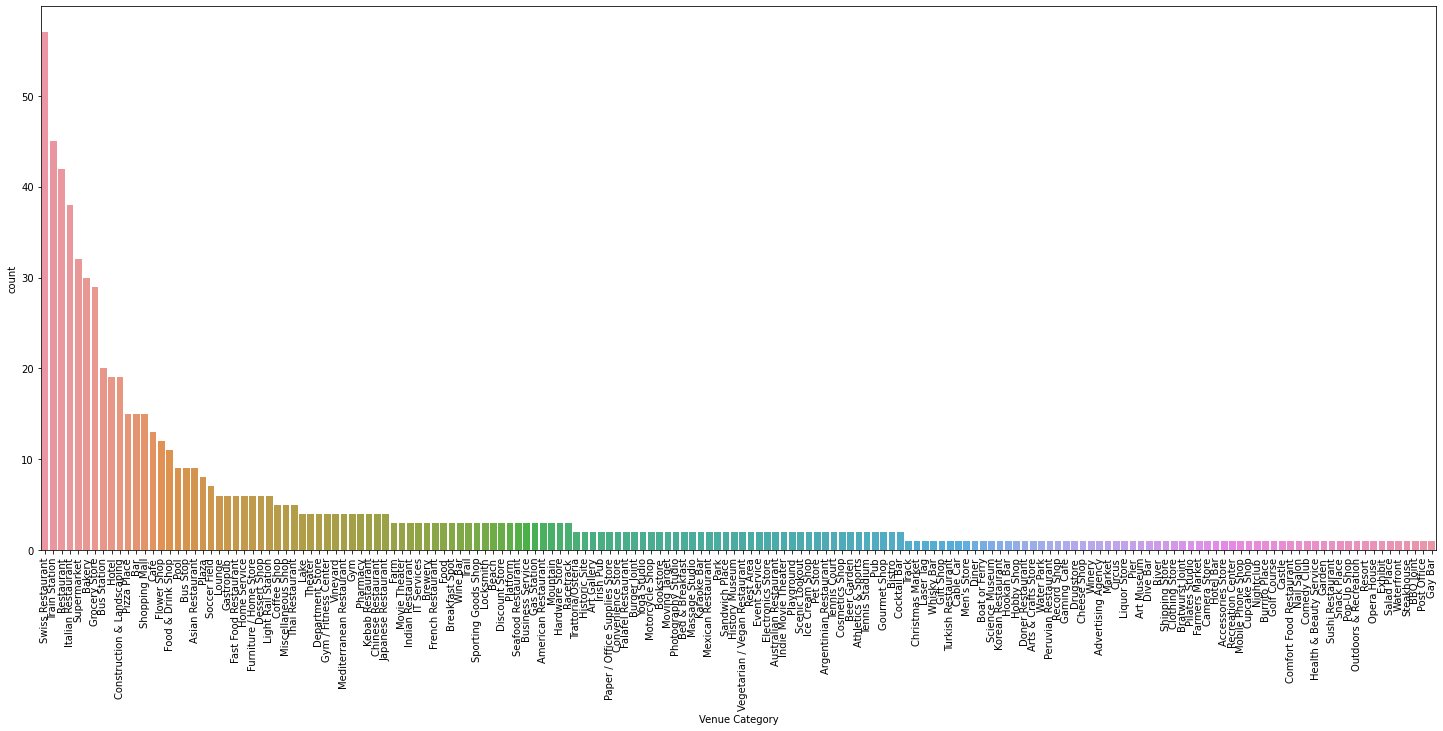

In [40]:
plt.rcParams["figure.figsize"]=25,10
ax = sns.countplot(x="Venue Category", data=zurich_venues,order = zurich_venues['Venue Category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [42]:
overall = zurich_venues['Venue Category'].value_counts().to_frame()
overall.head(20)

Venue Category
Swiss Restaurant                        57
Train Station                           45
Restaurant                              42
Italian Restaurant                      38
Supermarket                             32
Bakery                                  30
Grocery Store                           29
Bus Station                             20
Hotel                                   19
Construction & Landscaping              19
Pizza Place                             15
Bar                                     15
Shopping Mall                           15
Café                                    13
Flower Shop                             12
Food & Drink Shop                       11
Pool                                     9
Bus Stop                                 9
Asian Restaurant                         9
Plaza                                    8

In [43]:
!pip install pandas-profiling

import pandas_profiling
overall_profile = pandas_profiling.ProfileReport(overall)
overall_profile.to_file(output_file="overall_processing.html")

Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.27it/s]


### Analyze Each Neighborhood

In [44]:
# one hot encoding
zurich_onehot = pd.get_dummies(zurich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
zurich_onehot['Neighborhood'] = zurich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [zurich_onehot.columns[-1]] + list(zurich_onehot.columns[:-1])
zurich_onehot = zurich_onehot[fixed_columns]

zurich_onehot.head()

Neighborhood  Accessories Store  Advertising Agency  American Restaurant  \
0       Winkel                  0                   0                    0   
1       Winkel                  0                   0                    0   
2       Winkel                  0                   0                    0   
3       Winkel                  0                   0                    0   
4       Winkel                  0                   0                    1   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  ...  Trattoria/Osteria  \
0                 0                   0  ...                  0   
1                 0                   0  ...                  0   
2                 0                   0  ...                  0   
3                 0                   0  ...                  0   
4                 0                   0  ...                  0   

   Turkish Restaurant  Vegetarian / Vegan Restaurant  Vineyard  Water Park  \
0                   0                              0         0           0   
1                   0                              0         0           0   
2                   0                              0         0           0   
3                   0                              0         0           0   
4                   0                              0         0           0   

   Waterfront  Whisky Bar  Wine Bar  Winery  Yoga Studio  
0           0           0         0       0            0  
1           0           0         0       0            0  
2           0           0         0       0            0  
3           0           0         0       0            0  
4           0           0         0       0            0  

[5 rows x 169 columns]

In [45]:
zurich_onehot.shape

(765, 169)

#### group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [46]:
zurich_grouped = zurich_onehot.groupby('Neighborhood').mean().reset_index()
zurich_grouped

Neighborhood  Accessories Store  Advertising Agency  \
0              Adliswil                0.0                 0.0   
1            Aesch (ZH)                0.0                 0.0   
2       Aeugst am Albis                0.0                 0.0   
3    Affoltern am Albis                0.0                 0.0   
4           Andelfingen                0.0                 0.0   
..                  ...                ...                 ...   
137           Wädenswil                0.0                 0.0   
138           Zell (ZH)                0.0                 0.0   
139            Zollikon                0.0                 0.0   
140             Zumikon                0.0                 0.0   
141              Zürich                0.0                 0.0   

     American Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                   0.00                     0.0          0.0        0.00   
1                   0.00                     0.0          0.0        0.00   
2                   0.00                     0.0          0.0        0.00   
3                   0.00                     0.0          0.0        0.00   
4                   0.00                     0.0          0.0        0.00   
..                   ...                     ...          ...         ...   
137                 0.00                     0.0          0.0        0.00   
138                 0.00                     0.0          0.0        0.00   
139                 0.00                     0.0          0.0        0.00   
140                 0.00                     0.0          0.0        0.00   
141                 0.01                     0.0          0.0        0.01   

     Arts & Crafts Store  Asian Restaurant  Athletics & Sports  ...  \
0                    0.0              0.00                 0.0  ...   
1                    0.0              0.00                 0.0  ...   
2                    0.0              0.00                 0.0  ...   
3                    0.0              0.00                 0.0  ...   
4                    0.0              0.00                 0.0  ...   
..                   ...               ...                 ...  ...   
137                  0.0              0.00                 0.0  ...   
138                  0.0              0.00                 0.0  ...   
139                  0.0              0.00                 0.0  ...   
140                  0.0              0.00                 0.0  ...   
141                  0.0              0.01                 0.0  ...   

     Trattoria/Osteria  Turkish Restaurant  Vegetarian / Vegan Restaurant  \
0                  0.0                 0.0                           0.00   
1                  0.0                 0.0                           0.00   
2                  0.0                 0.0                           0.00   
3                  0.0                 0.0                           0.00   
4                  0.0                 0.0                           0.00   
..                 ...                 ...                            ...   
137                0.0                 0.0                           0.00   
138                0.0                 0.0                           0.00   
139                0.0                 0.0                           0.00   
140                0.0                 0.0                           0.00   
141                0.0                 0.0                           0.02   

     Vineyard  Water Park  Waterfront  Whisky Bar  Wine Bar  Winery  \
0         0.0         0.0        0.00         0.0       0.0     0.0   
1         0.0         0.0        0.00         0.0       0.0     0.0   
2         0.0         0.0        0.00         0.0       0.0     0.0   
3         0.0         0.0        0.00         0.0       0.0     0.0   
4         0.0         0.0        0.00         0.0       0.0     0.0   
..        ...         ...         ...         ...       ...     ...   
137       0.0     

In [47]:
zurich_grouped.shape

(142, 169)

In [48]:
num_top_venues = 15

for hood in zurich_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = zurich_grouped[zurich_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adliswil----
                            venue  freq
0                     Supermarket   0.2
1                      Restaurant   0.1
2                       Cable Car   0.1
3                             Pub   0.1
4                Swiss Restaurant   0.1
5              Light Rail Station   0.1
6              Falafel Restaurant   0.1
7            Fast Food Restaurant   0.1
8                            Park   0.1
9   Paper / Office Supplies Store   0.0
10                     Nail Salon   0.0
11                      Nightclub   0.0
12                    Opera House   0.0
13          Outdoors & Recreation   0.0
14              Accessories Store   0.0


----Aesch (ZH)----
                            venue  freq
0                           Plaza  0.33
1      Construction & Landscaping  0.33
2                Swiss Restaurant  0.33
3                            Park  0.00
4                   Movie Theater  0.00
5                   Moving Target  0.00
6                      Nail Salon  0.00
7 

14             Photography Studio   0.0


----Embrach----
                    venue  freq
0             Bus Station  0.25
1           Shopping Mall  0.25
2        Swiss Restaurant  0.25
3       Food & Drink Shop  0.25
4                Mountain  0.00
5           Movie Theater  0.00
6           Moving Target  0.00
7              Nail Salon  0.00
8               Nightclub  0.00
9             Opera House  0.00
10  Outdoors & Recreation  0.00
11      Accessories Store  0.00
12                   Park  0.00
13    Peruvian Restaurant  0.00
14              Pet Store  0.00


----Erlenbach (ZH)----
                            venue  freq
0                      Restaurant  0.17
1                Asian Restaurant  0.17
2                 Thai Restaurant  0.17
3            Fast Food Restaurant  0.17
4                          Bakery  0.17
5                           Trail  0.17
6                            Park  0.00
7                   Moving Target  0.00
8                      Nail Salon  0.00
9    

                            venue  freq
0                Swiss Restaurant   1.0
1               Accessories Store   0.0
2   Paper / Office Supplies Store   0.0
3                        Mountain   0.0
4                   Movie Theater   0.0
5                   Moving Target   0.0
6                      Nail Salon   0.0
7                       Nightclub   0.0
8                     Opera House   0.0
9           Outdoors & Recreation   0.0
10                           Park   0.0
11              Mobile Phone Shop   0.0
12            Peruvian Restaurant   0.0
13                      Pet Store   0.0
14                       Pharmacy   0.0


----Niederglatt----
                            venue  freq
0                   Train Station  0.17
1              Italian Restaurant  0.17
2                Swiss Restaurant  0.17
3                        Pharmacy  0.17
4                          Bakery  0.17
5                          Lounge  0.17
6   Paper / Office Supplies Store  0.00
7                 

14                       Pharmacy   0.0


----Volketswil----
                            venue  freq
0                      Restaurant  0.50
1                         Brewery  0.25
2                     Bus Station  0.25
3                            Park  0.00
4                   Movie Theater  0.00
5                   Moving Target  0.00
6                      Nail Salon  0.00
7                       Nightclub  0.00
8                     Opera House  0.00
9           Outdoors & Recreation  0.00
10  Paper / Office Supplies Store  0.00
11              Accessories Store  0.00
12                       Mountain  0.00
13                      Pet Store  0.00
14                       Pharmacy  0.00


----Wald (ZH)----
                            venue  freq
0                     Gas Station  0.25
1                      Restaurant  0.25
2                     Supermarket  0.25
3                          Bakery  0.25
4                  Pilates Studio  0.00
5           Outdoors & Recreation  0.00

In [49]:
# to dataframes
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = zurich_grouped['Neighborhood']

for ind in np.arange(zurich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zurich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0            Adliswil           Supermarket  Fast Food Restaurant   
1          Aesch (ZH)                 Plaza      Swiss Restaurant   
2     Aeugst am Albis              Mountain           Yoga Studio   
3  Affoltern am Albis           Pizza Place                   Bar   
4         Andelfingen                   Gym          Home Service   

        3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0          Falafel Restaurant                  Park             Cable Car   
1  Construction & Landscaping          Cupcake Shop               Exhibit   
2               Event Service                  Food           Flower Shop   
3                  Restaurant     Food & Drink Shop          Cupcake Shop   
4                  Restaurant         Train Station         Grocery Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Pub      Swiss Restaurant    Light Rail Station   
1                  Food           Flower Shop  Fast Food Restaurant   
2  Fast Food Restaurant        Farmers Market                  Farm   
3                  Food           Flower Shop  Fast Food Restaurant   
4             Drugstore  Fast Food Restaurant        Farmers Market   

  9th Most Common Venue 10th Most Common Venue  
0            Restaurant          Event Service  
1        Cosmetics Shop         Farmers Market  
2    Falafel Restaurant                Exhibit  
3        Farmers Market                   Farm  
4                  Farm     Falafel Restaurant

## Cluster Kantons / neighborhoods

In [51]:

# import k-means from clustering stage
from sklearn.cluster import KMeans


# set number of clusters
kclusters = 5

zurich_grouped_clustering = zurich_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zurich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 2, 2, 4, 2, 1, 2, 2, 0])

In [52]:
neighborhoods_venues_sorted.drop(['Cluster Labels'],axis=1, inplace=True)

KeyError: "['Cluster Labels'] not found in axis"

In [53]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [54]:
zurich_merged = zurich_data

# merge zurich_grouped with zurich_data to add latitude/longitude for each neighborhood
zurich_merged = zurich_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='kanton_name')

zurich_merged.head() # check the last columns!

country  postal_code         kanton kanton_letter         admin name2  \
0      CH         8185  Kanton Zürich            ZH       Bezirk Bülach   
1      CH         8903  Kanton Zürich            ZH     Bezirk Dietikon   
2      CH         8134  Kanton Zürich            ZH       Bezirk Horgen   
3      CH         8482  Kanton Zürich            ZH   Bezirk Winterthur   
4      CH         8452  Kanton Zürich            ZH  Bezirk Andelfingen   

        kanton_name  latitude  longitude  Cluster Labels  \
0            Winkel   47.4919     8.5537             2.0   
1  Birmensdorf (ZH)   47.3552     8.4426             2.0   
2          Adliswil   47.3100     8.5246             2.0   
3        Winterthur   47.4680     8.7578             4.0   
4           Adlikon   47.5823     8.6915             NaN   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0      Swiss Restaurant      Department Store   American Restaurant   
1           Pizza Place           Bus Station                 Diner   
2           Supermarket  Fast Food Restaurant    Falafel Restaurant   
3     Food & Drink Shop          Home Service         Train Station   
4                   NaN                   NaN                   NaN   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Comedy Club           Flower Shop             Gastropub   
1           Supermarket      Swiss Restaurant         Train Station   
2                  Park             Cable Car                   Pub   
3     Electronics Store                  Food           Flower Shop   
4                   NaN                   NaN                   NaN   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           Yoga Studio               Exhibit                  Food   
1     Food & Drink Shop                Bakery               Exhibit   
2      Swiss Restaurant    Light Rail Station            Restaurant   
3  Fast Food Restaurant        Farmers Market                  Farm   
4                   NaN                   NaN                   NaN   

  10th Most Common Venue  
0   Fast Food Restaurant  
1            Flower Shop  
2          Event Service  
3     Falafel Restaurant  
4                    NaN

In [55]:
zurich_merged.dtypes

country                    object
postal_code                 int64
kanton                     object
kanton_letter              object
admin name2                object
kanton_name                object
latitude                  float64
longitude                 float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

<AxesSubplot:>

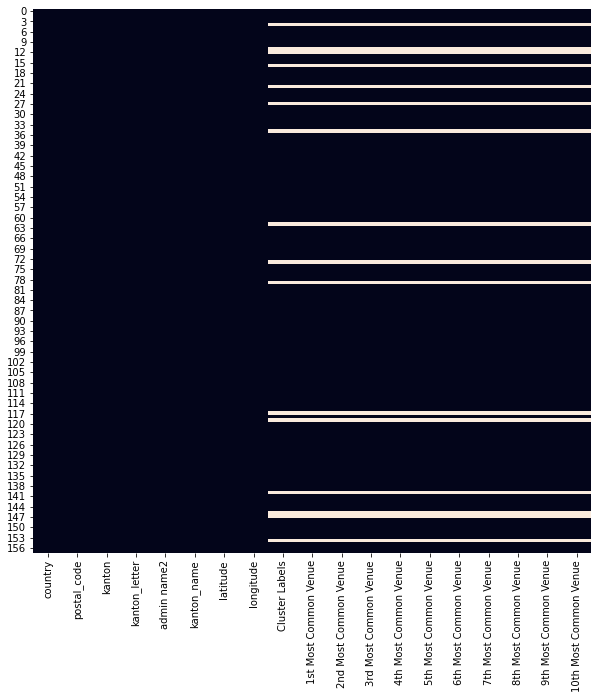

In [56]:
plt.rcParams["figure.figsize"]=10,10
sns.heatmap(zurich_merged.isnull(), cbar=False)

In [57]:
zurich_merged.isnull().sum()

country                    0
postal_code                0
kanton                     0
kanton_letter              0
admin name2                0
kanton_name                0
latitude                   0
longitude                  0
Cluster Labels            16
1st Most Common Venue     16
2nd Most Common Venue     16
3rd Most Common Venue     16
4th Most Common Venue     16
5th Most Common Venue     16
6th Most Common Venue     16
7th Most Common Venue     16
8th Most Common Venue     16
9th Most Common Venue     16
10th Most Common Venue    16
dtype: int64

In [58]:
zurich_merged2 = zurich_merged[zurich_merged['Cluster Labels'].notna()]
zurich_merged2.isnull().sum()

country                   0
postal_code               0
kanton                    0
kanton_letter             0
admin name2               0
kanton_name               0
latitude                  0
longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

In [59]:
zurich_merged2['Cluster Labels'] = zurich_merged2['Cluster Labels'].astype(int)
zurich_merged2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


country  postal_code         kanton kanton_letter        admin name2  \
0      CH         8185  Kanton Zürich            ZH      Bezirk Bülach   
1      CH         8903  Kanton Zürich            ZH    Bezirk Dietikon   
2      CH         8134  Kanton Zürich            ZH      Bezirk Horgen   
3      CH         8482  Kanton Zürich            ZH  Bezirk Winterthur   
5      CH         8487  Kanton Zürich            ZH  Bezirk Winterthur   

        kanton_name  latitude  longitude  Cluster Labels  \
0            Winkel   47.4919     8.5537               2   
1  Birmensdorf (ZH)   47.3552     8.4426               2   
2          Adliswil   47.3100     8.5246               2   
3        Winterthur   47.4680     8.7578               4   
5         Zell (ZH)   47.4393     8.8217               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0      Swiss Restaurant      Department Store   American Restaurant   
1           Pizza Place           Bus Station                 Diner   
2           Supermarket  Fast Food Restaurant    Falafel Restaurant   
3     Food & Drink Shop          Home Service         Train Station   
5            Playground         Train Station     Electronics Store   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Comedy Club           Flower Shop             Gastropub   
1           Supermarket      Swiss Restaurant         Train Station   
2                  Park             Cable Car                   Pub   
3     Electronics Store                  Food           Flower Shop   
5                  Food           Flower Shop  Fast Food Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           Yoga Studio               Exhibit                  Food   
1     Food & Drink Shop                Bakery               Exhibit   
2      Swiss Restaurant    Light Rail Station            Restaurant   
3  Fast Food Restaurant        Farmers Market                  Farm   
5        Farmers Market                  Farm    Falafel Restaurant   

  10th Most Common Venue  
0   Fast Food Restaurant  
1            Flower Shop  
2          Event Service  
3     Falafel Restaurant  
5                Exhibit

In [60]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zurich_merged2['latitude'], zurich_merged2['longitude'], zurich_merged2['kanton_name'], zurich_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [61]:
# create map of Zurich using latitude and longitude values
map_mix = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(zurich_data['latitude'], zurich_data['longitude'], zurich_data['kanton_name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mix)  
    
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zurich_merged2['latitude'], zurich_merged2['longitude'], zurich_merged2['kanton_name'], zurich_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mix)
    
map_mix

In [62]:
c0=zurich_merged2.loc[zurich_merged2['Cluster Labels'] == 0, zurich_merged2.columns[[1] + list(range(5, zurich_merged2.shape[1]))]]
c0

postal_code      kanton_name  latitude  longitude  Cluster Labels  \
14          8415   Berg am Irchel   47.5566     8.6054               0   
15          8104   Weiningen (ZH)   47.4202     8.4364               0   
20          8463      Benken (ZH)   47.6528     8.6539               0   
38          8825        Wädenswil   47.1757     8.6665               0   
41          8425      Oberembrach   47.4878     8.6183               0   
53          8174           Stadel   47.5294     8.4635               0   
58          8426         Lufingen   47.4911     8.5943               0   
76          8545  Rickenbach (ZH)   47.5519     8.7965               0   
84          8331        Pfäffikon   47.3443     8.8065               0   
124         8459           Volken   47.5748     8.6258               0   
125         8605       Volketswil   47.3839     8.7176               0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
14             Restaurant             Racetrack           Yoga Studio   
15             Restaurant      Swiss Restaurant     French Restaurant   
20             Restaurant                  Pool           Yoga Studio   
38             Restaurant      Swiss Restaurant     French Restaurant   
41             Restaurant     Electronics Store                  Food   
53             Restaurant      Swiss Restaurant        Discount Store   
58             Restaurant         Shopping Mall      Business Service   
76            Pizza Place            Restaurant           Bus Station   
84             Restaurant     Electronics Store                  Food   
124            Restaurant     Electronics Store                  Food   
125            Restaurant           Bus Station               Brewery   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
14            Flower Shop  Fast Food Restaurant        Farmers Market   
15                   Food           Flower Shop  Fast Food Restaurant   
20            Flower Shop  Fast Food Restaurant        Farmers Market   
38                   Food           Flower Shop  Fast Food Restaurant   
41            Flower Shop  Fast Food Restaurant        Farmers Market   
53          Event Service                  Food           Flower Shop   
58            Yoga Studio     Convenience Store           Flower Shop   
76            Flower Shop  Fast Food Restaurant        Farmers Market   
84            Flower Shop  Fast Food Restaurant        Farmers Market   
124           Flower Shop  Fast Food Restaurant        Farmers Market   
125           Yoga Studio                  Food           Flower Shop   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
14                   Farm    Falafel Restaurant               Exhibit   
15         Farmers Market                  Farm    Falafel Restaurant   
20                   Farm    Falafel Restaurant               Exhibit   
38         Farmers Market                  Farm    Falafel Restaurant   
41                   Farm    Falafel Restaurant               Exhibit   
53   Fast Food Restaurant        Farmers Market                  Farm   
58   Fast Food Restaurant        Farmers Market                  Farm   
76                   Farm    Falafel Restaurant               Exhibit   
84                   Farm    Falafel Restaurant               Exhibit   
124                  Farm    Falafel Restaurant               Exhibit   
125  Fast Food Restaurant        Farmers Market                  Farm   

    10th Most Common Venue  
14           Event Service  
15                 Exhibit  
20           Event Service  
38                 Exhibit  
41           Event Service  
53      Falafel Restaurant  
58      Falafel Restaurant  
76           Event Service  
84           Event Service  
124          Event Service  
125     Falafel Restaurant

In [63]:
import csv
path=r'C:\Users\jacob\Documents\01 Python\zurich_venues.csv'
venues_test= pd.read_csv(path)


In [64]:

all_cluster= folium.Map(location=[latitude, longitude], zoom_start=13) # 

for lat, lng, label in zip(zurich_data['latitude'], zurich_data['longitude'], zurich_data['kanton_name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(all_cluster)  
    

incidents = plugins.MarkerCluster().add_to(all_cluster)

# add a red circle marker 
for latitude, longitude, i in zip(venues_test['Venue Latitude'],venues_test['Venue Longitude'],venues_test['Venue Category']):
    
    label = '{}'.format(i)
    lable = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='black',
    popup=label,
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6,
    parse_html= False).add_to(all_cluster)



all_cluster

## result of the 5 clusters

In [66]:
zurich_merged2.loc[zurich_merged2['Cluster Labels'] == 1, zurich_merged2.columns[[1] + list(range(5, zurich_merged2.shape[1]))]]

postal_code  kanton_name  latitude  longitude  Cluster Labels  \
36          8164        Bachs   47.5239     8.4394               1   
46          8413   Neftenbach   47.5276     8.6649               1   
55          8468    Stammheim   47.6220     8.7782               1   
75          8911   Rifferswil   47.2437     8.4969               1   
114         8421    Dättlikon   47.5249     8.6245               1   
133         8115     Hüttikon   47.4426     8.3881               1   
152         8192  Glattfelden   47.5587     8.5017               1   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
36       Swiss Restaurant           Yoga Studio         Event Service   
46       Swiss Restaurant           Yoga Studio         Event Service   
55       Swiss Restaurant          Gourmet Shop           Yoga Studio   
75       Swiss Restaurant                  Café           Yoga Studio   
114      Swiss Restaurant           Yoga Studio         Event Service   
133      Swiss Restaurant               Exhibit           Yoga Studio   
152      Swiss Restaurant      Department Store   Arts & Crafts Store   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
36                   Food           Flower Shop  Fast Food Restaurant   
46                   Food           Flower Shop  Fast Food Restaurant   
55      French Restaurant                  Food           Flower Shop   
75      French Restaurant                  Food           Flower Shop   
114                  Food           Flower Shop  Fast Food Restaurant   
133         Event Service                  Food           Flower Shop   
152           Yoga Studio         Event Service                  Food   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
36         Farmers Market                  Farm    Falafel Restaurant   
46         Farmers Market                  Farm    Falafel Restaurant   
55   Fast Food Restaurant        Farmers Market                  Farm   
75   Fast Food Restaurant        Farmers Market                  Farm   
114        Farmers Market                  Farm    Falafel Restaurant   
133  Fast Food Restaurant        Farmers Market                  Farm   
152           Flower Shop  Fast Food Restaurant        Farmers Market   

    10th Most Common Venue  
36                 Exhibit  
46                 Exhibit  
55      Falafel Restaurant  
75      Falafel Restaurant  
114                Exhibit  
133     Falafel Restaurant  
152                   Farm

In [67]:
zurich_merged2.loc[zurich_merged2['Cluster Labels'] == 2, zurich_merged2.columns[[1] + list(range(5, zurich_merged2.shape[1]))]]

postal_code         kanton_name  latitude  longitude  Cluster Labels  \
0           8185              Winkel   47.4919     8.5537               2   
1           8903    Birmensdorf (ZH)   47.3552     8.4426               2   
2           8134            Adliswil   47.3100     8.5246               2   
6           8113           Boppelsen   47.4695     8.4061               2   
7           8494               Bauma   47.3674     8.8790               2   
..           ...                 ...       ...        ...             ...   
151         8465           Trüllikon   47.6406     8.6743               2   
153         8495          Turbenthal   47.4155     8.9029               2   
155         8428  Freienstein-Teufen   47.5512     8.5657               2   
156         8704          Herrliberg   47.2906     8.6146               2   
157         8046              Zürich   47.3667     8.5500               2   

      1st Most Common Venue       2nd Most Common Venue 3rd Most Common Venue  \
0          Swiss Restaurant            Department Store   American Restaurant   
1               Pizza Place                 Bus Station                 Diner   
2               Supermarket        Fast Food Restaurant    Falafel Restaurant   
6               IT Services               Grocery Store         Event Service   
7        Advertising Agency                 Record Shop     Food & Drink Shop   
..                      ...                         ...                   ...   
151                    Pool           Electronics Store                  Food   
153                    Food                    Mountain             Gastropub   
155      Miscellaneous Shop                    Vineyard         Event Service   
156  Furniture / Home Store  Construction & Landscaping            Whisky Bar   
157      Italian Restaurant                       Hotel      Swiss Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0             Comedy Club           Flower Shop             Gastropub   
1             Supermarket      Swiss Restaurant         Train Station   
2                    Park             Cable Car                   Pub   
6                    Food           Flower Shop  Fast Food Restaurant   
7           Grocery Store           Yoga Studio     Electronics Store   
..                    ...                   ...                   ...   
151           Flower Shop  Fast Food Restaurant        Farmers Market   
153         Event Service           Flower Shop  Fast Food Restaurant   
155     Food & Drink Shop                  Food           Flower Shop   
156           Bus Station        Massage Studio      Swiss Restaurant   
157                  Café           Coffee Shop                 Plaza   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0             Yoga Studio               Exhibit                  Food   
1       Food & Drink Shop                Bakery               Exhibit   
2        Swiss Restaurant    Light Rail Station            Restaurant   
6          Farmers Market                  Farm    Falafel Restaurant   
7             Flower Shop  Fast Food Restaurant        Farmers Market   
..                    ...                   ...                   ...   
151                  Farm    Falafel Restaurant               Exhibit   
153        Farmers Market                  Farm    Falafel Restaurant   
155  Fast Food Restaurant        Farmers Market                  Farm   
156            Restaurant                Bakery               Exhibit   
157                   Bar                Lounge     French Restaurant   

    10th Most Common Venue  
0     Fast Food Restaurant  
1              Flower Shop  
2            Event Service  
6                  Exhibit  
7                     Farm  
..                     ...  
151          Event Service  
153                Exhibit  
155     Falafel Restaurant  
156            Flower Shop  
157                 Bakery  

[95 

In [68]:
zurich_merged2.loc[zurich_merged2['Cluster Labels'] == 3, zurich_merged2.columns[[1] + list(range(5, zurich_merged2.shape[1]))]]

postal_code          kanton_name  latitude  longitude  Cluster Labels  \
10          8904           Aesch (ZH)   47.3367     8.4410               3   
31          8196             Wil (ZH)   47.6045     8.5081               3   
34          8492                 Wila   47.4193     8.8452               3   
37          8414       Buch am Irchel   47.5500     8.6333               3   
56          8933          Maschwanden   47.2343     8.4271               3   
108         8548  Ellikon an der Thur   47.5630     8.8233               3   
111         8132                  Egg   47.3074     8.6834               3   
141         8340               Hinwil   47.2943     8.8439               3   

          1st Most Common Venue     2nd Most Common Venue  \
10                        Plaza          Swiss Restaurant   
31   Construction & Landscaping             Event Service   
34   Construction & Landscaping              Home Service   
37   Construction & Landscaping                      Farm   
56   Construction & Landscaping               Bus Station   
108  Construction & Landscaping  Mediterranean Restaurant   
111  Construction & Landscaping        Italian Restaurant   
141                Soccer Field            Shipping Store   

          3rd Most Common Venue       4th Most Common Venue  \
10   Construction & Landscaping                Cupcake Shop   
31            Food & Drink Shop                        Food   
34             Business Service                        Café   
37                Event Service           Food & Drink Shop   
56                  Yoga Studio               Event Service   
108               Event Service                        Food   
111          Light Rail Station                 Yoga Studio   
141                        Farm  Construction & Landscaping   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
10                Exhibit                  Food           Flower Shop   
31            Flower Shop  Fast Food Restaurant        Farmers Market   
34          Train Station                 Trail           Yoga Studio   
37                   Food           Flower Shop  Fast Food Restaurant   
56                   Food           Flower Shop  Fast Food Restaurant   
108           Flower Shop  Fast Food Restaurant        Farmers Market   
111         Event Service                  Food           Flower Shop   
141            Hobby Shop        History Museum           Flower Shop   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
10   Fast Food Restaurant        Cosmetics Shop         Farmers Market  
31                   Farm    Falafel Restaurant                Exhibit  
34          Event Service           Flower Shop   Fast Food Restaurant  
37         Farmers Market    Falafel Restaurant                Exhibit  
56         Farmers Market                  Farm     Falafel Restaurant  
108                  Farm    Falafel Restaurant                Exhibit  
111  Fast Food Restaurant        Farmers Market                   Farm  
141  Fast Food Restaurant        Farmers Market             Hookah Bar

In [69]:
zurich_merged2.loc[zurich_merged2['Cluster Labels'] == 4, zurich_merged2.columns[[1] + list(range(5, zurich_merged2.shape[1]))]]

postal_code     kanton_name  latitude  longitude  Cluster Labels  \
3           8482      Winterthur   47.4680     8.7578               4   
5           8487       Zell (ZH)   47.4393     8.8217               4   
13          8450     Andelfingen   47.5945     8.6783               4   
50          8932  Mettmenstetten   47.2453     8.4635               4   
61          8713           Stäfa   47.2367     8.7573               4   
69          8942      Oberrieden   47.2744     8.5784               4   
72          8153         Rümlang   47.4504     8.5299               4   
77          8833     Richterswil   47.1917     8.6820               4   
83          8197            Rafz   47.6044     8.5430               4   
85          8422         Pfungen   47.5139     8.6423               4   
86          8603   Schwerzenbach   47.3821     8.6573               4   
89          8475        Ossingen   47.6118     8.7278               4   
90          8607       Seegräben   47.3351     8.7700               4   
95          8165    Oberweningen   47.5023     8.4070               4   
98          8802  Kilchberg (ZH)   47.3244     8.5455               4   
100         8498     Fischenthal   47.3153     8.9141               4   
109         8353            Elgg   47.4972     8.8652               4   
118         8458            Dorf   47.5729     8.6478               4   
142         8247      Flurlingen   47.6839     8.6299               4   
144         8444        Henggart   47.5627     8.6821               4   
145         8908        Hedingen   47.2979     8.4483               4   

      1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
3         Food & Drink Shop          Home Service         Train Station   
5                Playground         Train Station     Electronics Store   
13                      Gym          Home Service            Restaurant   
50            Grocery Store      Swiss Restaurant              Dive Bar   
61            Train Station    Seafood Restaurant        History Museum   
69           Breakfast Spot         Train Station    Seafood Restaurant   
72              Pizza Place         Train Station           Yoga Studio   
77   Furniture / Home Store             Gastropub        Hardware Store   
83               Restaurant           Flower Shop             Locksmith   
85                Gastropub                 Beach         Train Station   
86            Train Station         Shopping Mall         Grocery Store   
89               Restaurant           Flower Shop         Train Station   
90            Train Station      Swiss Restaurant           Yoga Studio   
95            Train Station     Electronics Store                  Food   
98              Supermarket             Gastropub                  Farm   
100             Pizza Place        Massage Studio         Train Station   
109  Furniture / Home Store                   Bar         Train Station   
118             Gaming Cafe              Bus Stop         Train Station   
142          Cosmetics Shop         Train Station                   Bar   
144            Home Service           Flower Shop         Train Station   
145             Pizza Place      Swiss Restaurant         Train Station   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
3       Electronics Store                  Food           Flower Shop   
5                    Food           Flower Shop  Fast Food Restaurant   
13          Train Station         Grocery Store             Drugstore   
50          Train Station            Restaurant     Electronics Store   
61              Locksmith      Swiss Restaurant           Yoga Studio   
69                   Lake         Grocery Store                 Diner   
72      Electronics Store                  Food           Flower Shop   
77          Train Station     Food & Drink Shop         Event Service   
83          Train Station           Yoga Studio  Fast Food Restaurant   
85            Yog

In [72]:
zurich_merged2.loc[zurich_merged2['Cluster Labels'] == 0, zurich_merged2.columns[[1] + list(range(0, zurich_merged2.shape[1]))]]

postal_code country  postal_code         kanton kanton_letter  \
14          8415      CH         8415  Kanton Zürich            ZH   
15          8104      CH         8104  Kanton Zürich            ZH   
20          8463      CH         8463  Kanton Zürich            ZH   
38          8825      CH         8825  Kanton Zürich            ZH   
41          8425      CH         8425  Kanton Zürich            ZH   
53          8174      CH         8174  Kanton Zürich            ZH   
58          8426      CH         8426  Kanton Zürich            ZH   
76          8545      CH         8545  Kanton Zürich            ZH   
84          8331      CH         8331  Kanton Zürich            ZH   
124         8459      CH         8459  Kanton Zürich            ZH   
125         8605      CH         8605  Kanton Zürich            ZH   

            admin name2      kanton_name  latitude  longitude  Cluster Labels  \
14   Bezirk Andelfingen   Berg am Irchel   47.5566     8.6054               0   
15      Bezirk Dietikon   Weiningen (ZH)   47.4202     8.4364               0   
20   Bezirk Andelfingen      Benken (ZH)   47.6528     8.6539               0   
38        Bezirk Horgen        Wädenswil   47.1757     8.6665               0   
41        Bezirk Bülach      Oberembrach   47.4878     8.6183               0   
53     Bezirk Dielsdorf           Stadel   47.5294     8.4635               0   
58        Bezirk Bülach         Lufingen   47.4911     8.5943               0   
76    Bezirk Winterthur  Rickenbach (ZH)   47.5519     8.7965               0   
84     Bezirk Pfäffikon        Pfäffikon   47.3443     8.8065               0   
124  Bezirk Andelfingen           Volken   47.5748     8.6258               0   
125        Bezirk Uster       Volketswil   47.3839     8.7176               0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
14             Restaurant             Racetrack           Yoga Studio   
15             Restaurant      Swiss Restaurant     French Restaurant   
20             Restaurant                  Pool           Yoga Studio   
38             Restaurant      Swiss Restaurant     French Restaurant   
41             Restaurant     Electronics Store                  Food   
53             Restaurant      Swiss Restaurant        Discount Store   
58             Restaurant         Shopping Mall      Business Service   
76            Pizza Place            Restaurant           Bus Station   
84             Restaurant     Electronics Store                  Food   
124            Restaurant     Electronics Store                  Food   
125            Restaurant           Bus Station               Brewery   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
14            Flower Shop  Fast Food Restaurant        Farmers Market   
15                   Food           Flower Shop  Fast Food Restaurant   
20            Flower Shop  Fast Food Restaurant        Farmers Market   
38                   Food           Flower Shop  Fast Food Restaurant   
41            Flower Shop  Fast Food Restaurant        Farmers Market   
53          Event Service                  Food           Flower Shop   
58            Yoga Studio     Convenience Store           Flower Shop   
76            Flower Shop  Fast Food Restaurant        Farmers Market   
84            Flower Shop  Fast Food Restaurant        Farmers Market   
124           Flower Shop  Fast Food Restaurant        Farmers Market   
125           Yoga Studio                  Food           Flower Shop   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
14                   Farm    Falafel Restaurant               Exhibit   
15         Farmers Market                  Farm    Falafel Restaurant   
20                   Farm    Falafel Restaurant               Exhibit   
38         Farmers Market                  Farm    Falafel Restaurant   
41                   Farm    Falafel Restaurant               Exhibit   

### cluster outcome labeling

In [76]:
jupyter nbconvert--to pdf --TemplateExporter.exclude_input=True battle02.ipynb

SyntaxError: invalid syntax (<ipython-input-76-2602f9b77aa2>, line 1)